<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

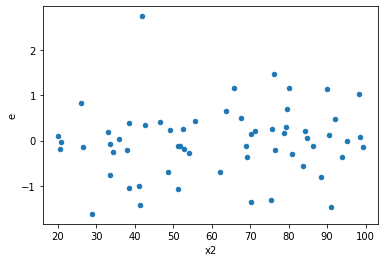

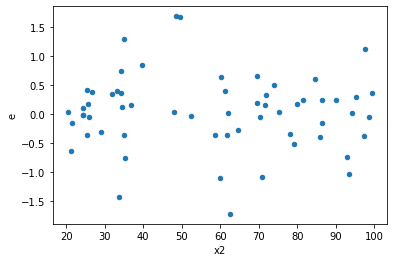

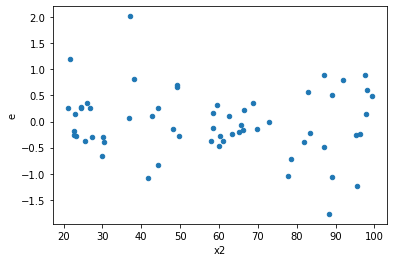

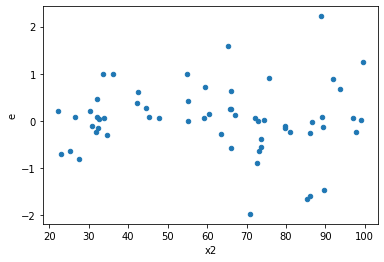

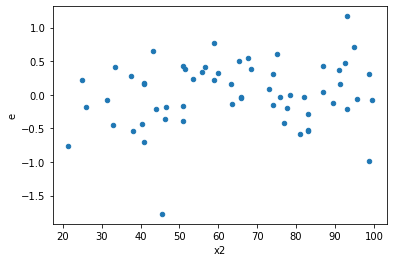

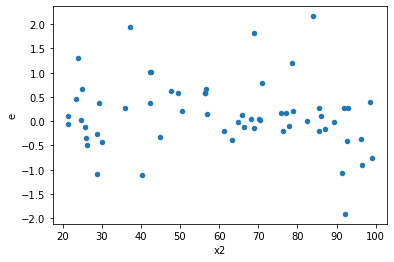

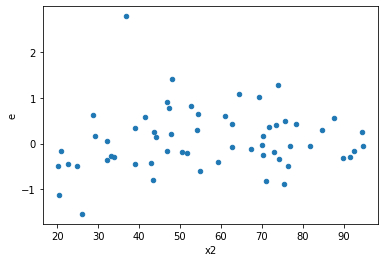

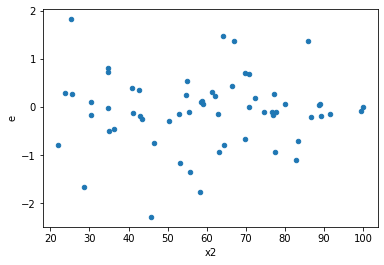

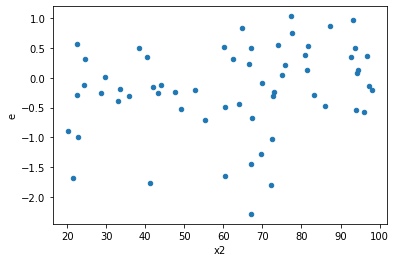

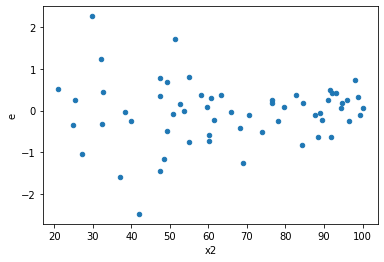

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,9.798768012345542,10.68646514926546,0.466608000587883,0.5088792928221648,1.0905927291881492,0.84435770824284,0.57782114587858,0.42217885412142,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,3.8128020097670006,13.222939979711114,0.18156200046509527,0.6296638085576721,3.468037402896555,0.00627343667458069,0.9968632816627097,0.003136718337290345,Reject001=0 : Heteroscedasticity
10.0,21.0,21.0,6.007443228849909,13.474765111423672,0.286068725183329,0.6416554814963653,2.2430116437410494,0.07102013998100154,0.9644899300094992,0.03551006999050077,Reject001=1 : Homoscedasticity
11.0,21.0,21.0,4.75676409728575,8.098019216800653,0.22651257606122618,0.385619962704793,1.7024218672987066,0.23101279854263557,0.8844936007286822,0.11550639927131778,Reject001=1 : Homoscedasticity
12.0,21.0,21.0,9.194170596590448,20.695927496665213,0.437817647456688,0.9855203569840578,2.250983629163903,0.06982020637818898,0.9650898968109055,0.03491010318909449,Reject001=1 : Homoscedasticity
14.0,21.0,21.0,7.586985249251273,11.829715147822043,0.3612850118691083,0.5633197689439068,1.5592115654883427,0.3165047267994314,0.8417476366002843,0.1582523633997157,Reject001=1 : Homoscedasticity
17.0,21.0,21.0,12.052883435539968,12.215565349957862,0.573946830263808,0.5816935880932315,1.013497344041194,0.9757831893662816,0.5121084053168592,0.4878915946831408,Reject001=1 : Homoscedasticity
19.0,21.0,21.0,10.458407154750455,13.195022068154504,0.49801938832145026,0.6283343841978335,1.2616665112488963,0.5991046871228256,0.7004476564385872,0.2995523435614128,Reject001=1 : Homoscedasticity
20.0,21.0,21.0,5.824290737979786,19.384380945418748,0.2773471779990374,0.9230657593056547,3.3281959671097083,0.008108950991529307,0.9959455245042353,0.004054475495764653,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,16.01527257773366,11.624913189851197,0.7626320275111267,0.5535672947548189,0.7258642107667612,0.46912530481106174,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,6.366761646754352,4.710071408398515,0.3031791260359215,0.22428911468564358,0.7397907554462347,0.49579048202143344,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,9.798768012345542,10.68646514926546,0.466608000587883,0.5088792928221648,1.0905927291881492,0.84435770824284,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,3.8128020097670006,13.222939979711114,0.18156200046509527,0.6296638085576721,3.468037402896555,0.00627343667458069,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,5.558244966989313,4.936207906262001,0.2646783317613958,0.23505751934580957,0.8880875052428204,0.7882016034216274,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,10.657162766363554,7.808220276616696,0.5074839412554073,0.37182001317222363,0.7326734561342375,0.4821237632891325,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,11.35344936088574,5.298037997883746,0.5406404457564639,0.2522875237087498,0.4666456712385793,0.08805615843452608,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,15.39476577786681,7.467880196849178,0.7330840846603243,0.3556133427071037,0.4850921608424738,0.10505913209810623,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,7.934616404258866,5.5744419265983804,0.3778388763932793,0.26544961555230384,0.7025471229593818,0.42526683501810036,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      918
Reject001=0 : Heteroscedasticity     82
Name: Result_test, dtype: int64